<a href="https://colab.research.google.com/github/otienocliff/Portfolio/blob/master/ICS_352_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Input: (0, 0), Output: 0
Input: (0, 1), Output: 0
Input: (1, 0), Output: 0
Input: (1, 1), Output: 1


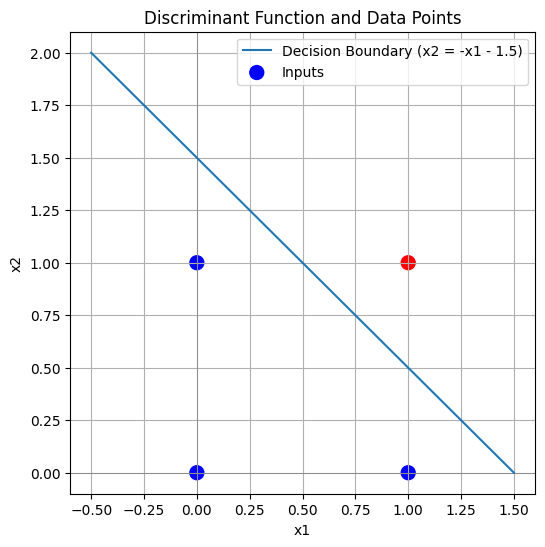

The neuron implements an AND gate.


In [ ]:
# Define weights, bias, and threshold function
import numpy as np
import matplotlib.pyplot as plt

# Weights and bias
w1, w2 = 1, 1
b = -1.5

# Activation function (threshold)
def threshold_activation(x1, x2):
    net_input = w1 * x1 + w2 * x2 + b
    return 1 if net_input >= 0 else 0

# Test inputs
inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
outputs = [threshold_activation(x1, x2) for x1, x2 in inputs]

# Display results
for inp, out in zip(inputs, outputs):
    print(f"Input: {inp}, Output: {out}")

# Discriminant function: w1*x1 + w2*x2 + b = 0
# Solve for x2 as a function of x1: x2 = -w1/w2 * x1 - b/w2
x1_values = np.linspace(-0.5, 1.5, 100)
x2_values = -w1/w2 * x1_values - b/w2

# Plot the decision boundary
plt.figure(figsize=(6, 6))
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.plot(x1_values, x2_values, label="Decision Boundary (x2 = -x1 - 1.5)")
plt.scatter([x[0] for x in inputs], [x[1] for x in inputs], c=outputs, cmap='bwr', s=100, label="Inputs")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Discriminant Function and Data Points")
plt.legend()
plt.grid()
plt.show()

# Identify logic gate
if outputs == [0, 0, 0, 1]:
    print("The neuron implements an AND gate.")
elif outputs == [0, 1, 1, 1]:
    print("The neuron implements an OR gate.")
elif outputs == [0, 1, 1, 0]:
    print("The neuron implements an XOR gate.")
else:
    print("The neuron implements a different logic function.")


Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 0
Accuracy: 100.00%


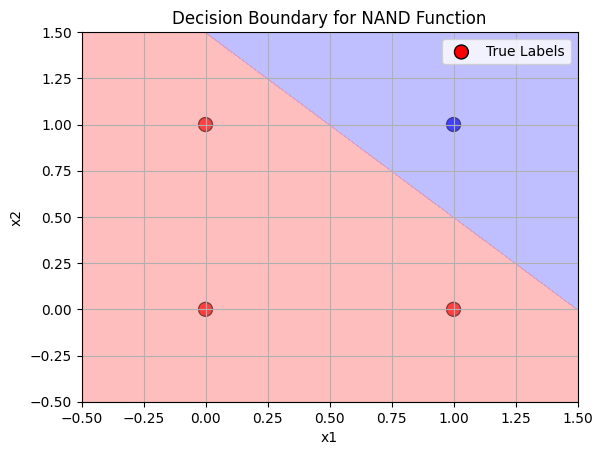

In [ ]:
from sklearn.linear_model import Perceptron
import numpy as np

# Define the NAND dataset
# Inputs (x1, x2) and outputs (NAND function)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input pairs
y = np.array([1, 1, 1, 0])  # NAND outputs

# Create and train a perceptron
model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X, y)

# Test the perceptron on the NAND function
outputs = model.predict(X)

# Display results
for inp, out in zip(X, outputs):
    print(f"Input: {inp}, Predicted Output: {out}")

# Check if the perceptron has learned the correct function
accuracy = model.score(X, y)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Visualize the decision boundary
import matplotlib.pyplot as plt

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=100, edgecolor='k', label="True Labels")

# Plot decision boundary
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5, cmap='bwr', levels=np.linspace(-0.5, 1.5, 3))
plt.title("Decision Boundary for NAND Function")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Training dataset
data = [
    [0, 1, 0, 0, 0],  # Example 1
    [1, 0, 1, 0, 1],  # Example 2
    [0, 0, 1, 1, 1],  # Example 3
    [0, 0, 1, 0, 0],  # Example 4
    [0, 0, 0, 1, 0],  # Example 5
    [1, 0, 0, 1, 0],  # Example 6
    [1, 0, 0, 0, 1],  # Example 7
    [0, 1, 1, 1, 1],  # Example 8
    [0, 1, 1, 0, 0],  # Example 9
    [1, 1, 1, 0, 1],  # Example 10
    [1, 1, 0, 1, 0],  # Example 11
    [0, 0, 0, 0, 0],  # Example 12
]

# Convert to numpy array for processing
data = np.array(data)

# Split features (X) and target (y)
X = data[:, :-1]  # Features: Comedy, Doctors, Lawyers, Guns
y = data[:, -1]   # Target: Likes

# Create and train the SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X, y)

# New input to predict
new_input = np.array([[1, 1, 0, 0]])  # Comedy = True, Doctors = True, Lawyers = False, Guns = False

# Predict whether the user will like the TV show
prediction = svm_model.predict(new_input)
print("Predicted Like (1) or Not Like (0):", prediction[0])


Predicted Like (1) or Not Like (0): 0


Features, Targets, and Classes
Features:

Comedy
Doctors
Lawyers
Guns

Target:

Likes: This is the output (label) indicating whether the user likes the TV show (1) or not (0).

Classes:

There are two classes in this example:
Class 0: Not liked.
Class 1: Liked.

Is SVM Supervised or Unsupervised Learning?
SVM is a supervised learning algorithm.
Why?
Supervised learning involves learning from labeled data where the target variable (output) is provided.
In this case, the target variable Likes indicates whether the user likes the show or not. The SVM uses this labeled data to learn a decision boundary.